In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
import cv2
from PIL import Image
import os

from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix

print("Setup Complete.")

Setup Complete.


In [2]:
from skimage.feature import hog
from skimage.feature import hog
from skimage import exposure

def load_data(path):
    data = []
    for (dirpath, _, filenames) in os.walk(path):
        for filename in filenames:
            image_path = os.path.join(dirpath, filename)
            
            # Check if the image file exists
            if not os.path.exists(image_path):
                print(f"Image file not found: {image_path}")
                continue
            
            image = cv2.imread(image_path)

            # Check if the image could not be loaded
            if image is None:
                print(f"Failed to load image: {image_path}")
                continue

            gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

            # Compute HOG features
            features, hog_image = hog(gray_image, pixels_per_cell=(16, 16), block_norm='L2-Hys',
                                      visualize=True, transform_sqrt=True)
            
            # Apply histogram equalization to the HOG image (optional)
            hog_image = exposure.equalize_hist(hog_image)

            # Resize the HOG image if needed
            hog_image_resized = cv2.resize(hog_image, (256, 256))

            # Flatten the HOG image and append to the data list
            data.append(hog_image_resized.flatten())

    return data



path = 'resized_dataset'
print("1")
normal_train    = load_data(path + '/train/NORMAL/')
print("2")
pneumonia_train = load_data(path + '/train/PNEUMONIA/')
print("3")
normal_test     = load_data(path + '/test/NORMAL/')
print("4")
pneumonia_test  = load_data(path + '/test/PNEUMONIA/')
print("5")

# Merge both cases into an array
X_train = normal_train + pneumonia_train
X_test  = normal_test  + pneumonia_test

#in these set gonna be thresholded
X_train2 = X_train
X_test2 = X_test

# Generate outcomes for them
y_train = [0] * len(normal_train) + [1] * len(pneumonia_train)
y_test  = [0] * len(normal_test)  + [1] * len(pneumonia_test)

1
2
3
4
5


In [3]:
len(X_train)

5914

In [4]:
len(X_test)

644

# Shuffle data (not necessary)

In [5]:
# 데이터 셔플
permutation = np.random.permutation(len(X_train))
X_train = np.array(X_train)[permutation]
X_train2 = np.array(X_train)[permutation]
y_train = np.array(y_train)[permutation]

permutation = np.random.permutation(len(X_test))
X_test = np.array(X_test)[permutation]
X_test2 = np.array(X_test)[permutation]
y_test = np.array(y_test)[permutation]

In [6]:

from sklearn.svm import SVC

# Create an SVM classifier
svm_classifier = SVC(kernel='linear')

svm_classifier.fit(X_train2, y_train)

y_pred = svm_classifier.predict(X_test2)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")


Accuracy: 0.577639751552795
Precision: 0.6431535269709544
Recall: 0.7560975609756098
F1-score: 0.695067264573991


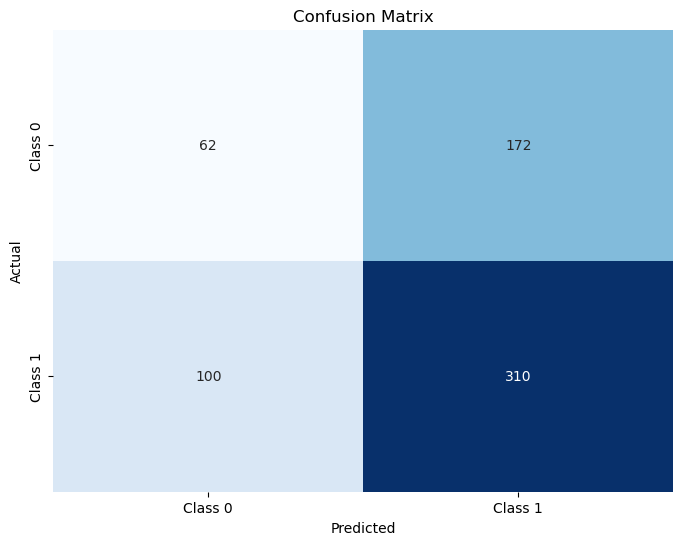

Accuracy: 0.577639751552795
Precision: 0.6431535269709544
Recall: 0.7560975609756098
F1-score: 0.695067264573991


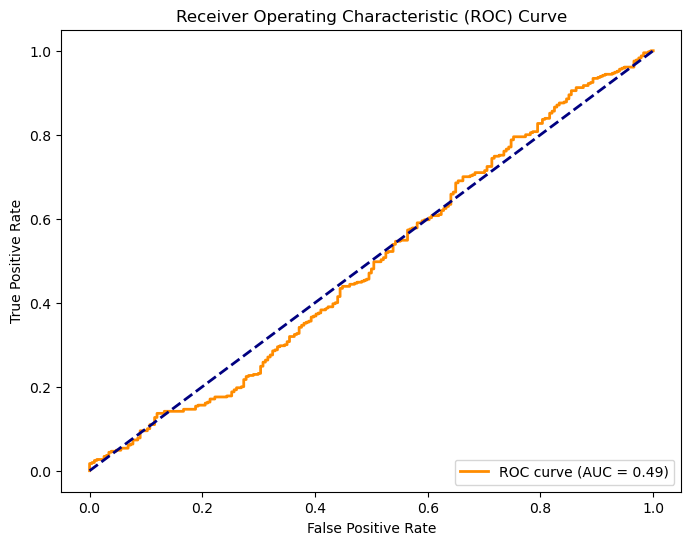

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Other metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

# ROC Curve (Receiver Operating Characteristic)
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

# Compute ROC curve and ROC area
y_probs = svm_classifier.decision_function(X_test2)
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


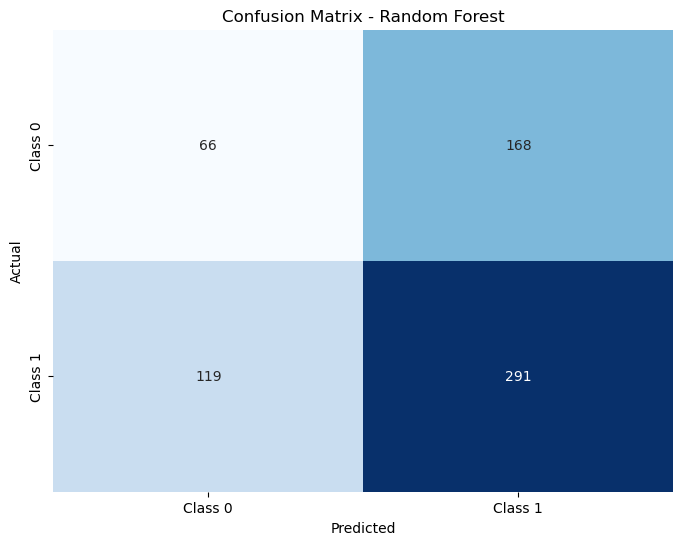

Random Forest Metrics:
Accuracy: 0.5543478260869565
Precision: 0.6339869281045751
Recall: 0.7097560975609756
F1-score: 0.669735327963176


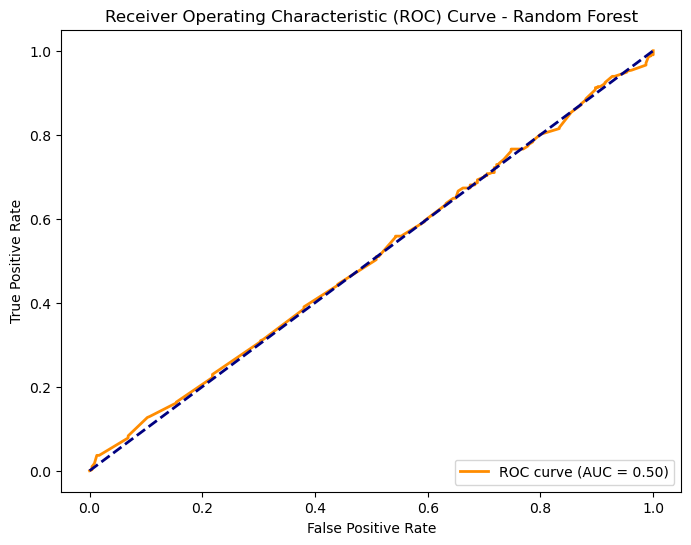

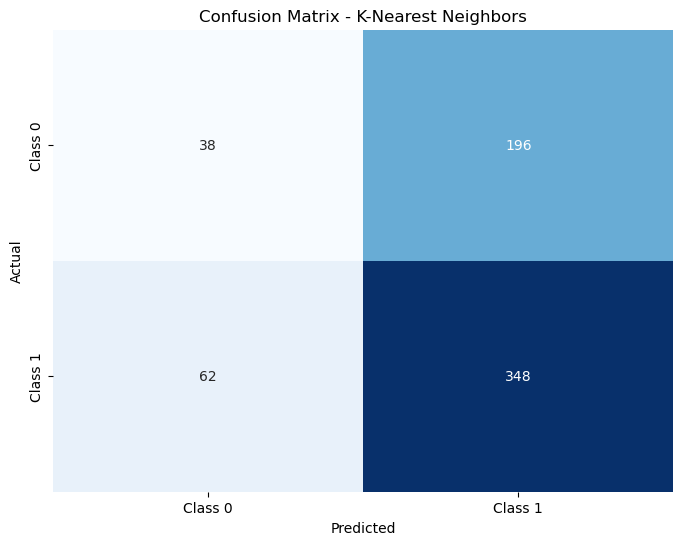

K-Nearest Neighbors Metrics:
Accuracy: 0.5993788819875776
Precision: 0.6397058823529411
Recall: 0.848780487804878
F1-score: 0.7295597484276729


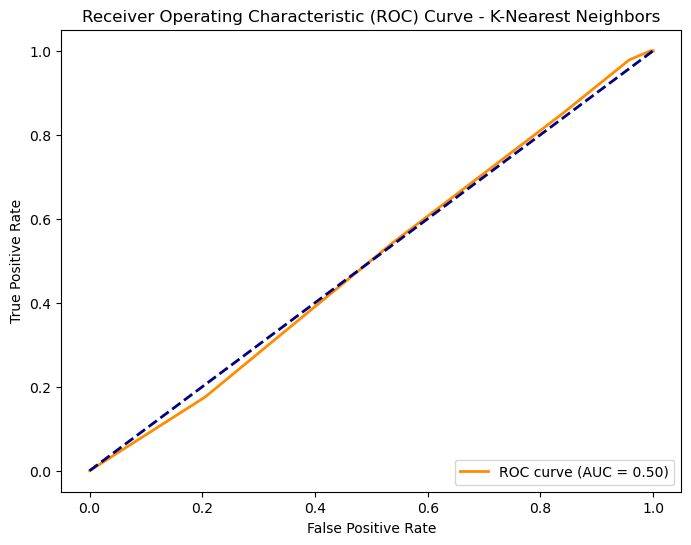

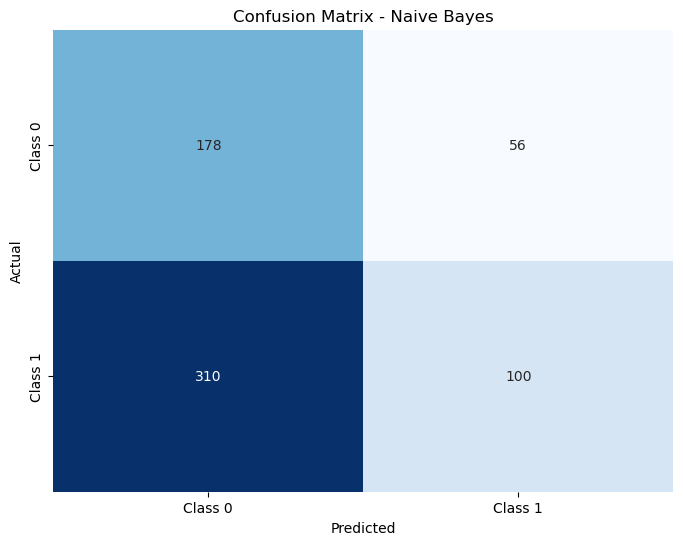

Naive Bayes Metrics:
Accuracy: 0.43167701863354035
Precision: 0.6410256410256411
Recall: 0.24390243902439024
F1-score: 0.35335689045936397


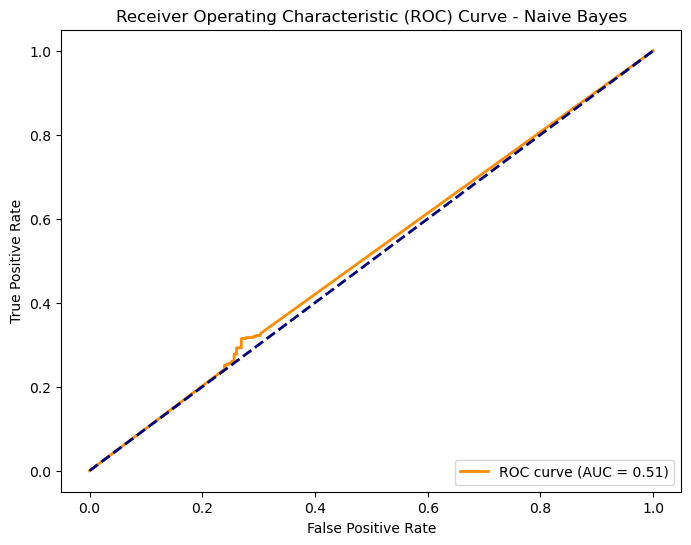

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


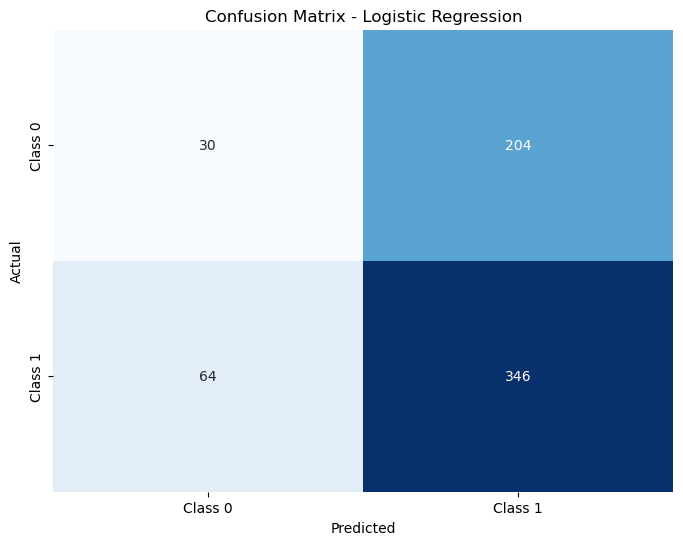

Logistic Regression Metrics:
Accuracy: 0.5838509316770186
Precision: 0.6290909090909091
Recall: 0.8439024390243902
F1-score: 0.7208333333333333


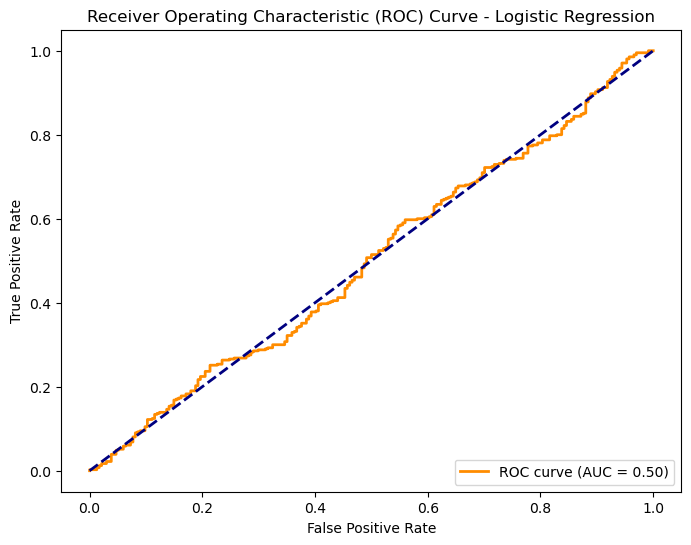

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

# Define and train other classifiers
random_forest_classifier = RandomForestClassifier()
knn_classifier = KNeighborsClassifier()
naive_bayes_classifier = GaussianNB()
logistic_regression_classifier = LogisticRegression()

classifiers = [
    ("Random Forest", random_forest_classifier),
    ("K-Nearest Neighbors", knn_classifier),
    ("Naive Bayes", naive_bayes_classifier),
    ("Logistic Regression", logistic_regression_classifier)
]

for clf_name, clf in classifiers:
    # Train the classifier
    clf.fit(X_train2, y_train)

    # Predictions
    y_pred = clf.predict(X_test2)

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Plotting the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=['Class 0', 'Class 1'],
                yticklabels=['Class 0', 'Class 1'])
    plt.title(f"Confusion Matrix - {clf_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Other metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"{clf_name} Metrics:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1}")

    # ROC Curve (Receiver Operating Characteristic)
    if hasattr(clf, "decision_function"):
        y_probs = clf.decision_function(X_test2)
    else:
        y_probs = clf.predict_proba(X_test2)[:, 1]

    fpr, tpr, thresholds = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve - {clf_name}')
    plt.legend(loc="lower right")
    plt.show()
